<a href="https://colab.research.google.com/github/aditiravindranayak/speech-to-text/blob/main/IAIML_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 0f0a572357.flac to 0f0a572357 (1).flac
Saving 0f0c93c254.flac to 0f0c93c254 (1).flac
Saving 0f0e3d7efc.flac to 0f0e3d7efc (1).flac
Saving 0f0ffedc27.flac to 0f0ffedc27 (1).flac
Saving 0f07f82aca.flac to 0f07f82aca (1).flac
Saving 0f7a791e1c.flac to 0f7a791e1c (1).flac
Saving 0f7ec21fb6.flac to 0f7ec21fb6 (1).flac
Saving 0f41d0807a.flac to 0f41d0807a (1).flac
Saving 0f045a877c.flac to 0f045a877c (1).flac
Saving 0f0084fe53.flac to 0f0084fe53.flac


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

User uploaded file "0f0a572357 (1).flac" with length 62162 bytes
User uploaded file "0f0c93c254 (1).flac" with length 89815 bytes
User uploaded file "0f0e3d7efc (1).flac" with length 44999 bytes
User uploaded file "0f0ffedc27 (1).flac" with length 51575 bytes
User uploaded file "0f07f82aca (1).flac" with length 50773 bytes
User uploaded file "0f7a791e1c (1).flac" with length 78942 bytes
User uploaded file "0f7ec21fb6 (1).flac" with length 93776 bytes
User uploaded file "0f41d0807a (1).flac" with length 91287 bytes
User uploaded file "0f045a877c (1).flac" with length 46215 bytes
User uploaded file "0f0084fe53.flac" with length 56079 bytes


In [ ]:
#library
import numpy as np
#import librosa
import scipy.io.wavfile as sciwave
from scipy.fftpack import dct
import matplotlib.pyplot as plt
from numpy.linalg import norm


In [ ]:
# # wave signal reading
# import soundfile as sf

from google.colab import files
import io
import soundfile as sf

uploaded_files = files.upload()

# Initialize dictionaries to store signals and sample rates
sample_signal = {}
sample_rate = {}

# Process the uploaded files
for i, (filename, content) in enumerate(uploaded_files.items()):
    # Use BytesIO to create a file-like object from the content
    audio_file = io.BytesIO(content)

    # Read the audio file
    data, sample_rate[str(i + 1)] = sf.read(audio_file)
    sample_signal[str(i + 1)] = data

    print(f"File {filename} has been read.")

# Print the read files and their corresponding sample rates
for key, value in sample_rate.items():
    print(f"File {key} - Sample Rate: {value}")


Saving 0f0a572357.flac to 0f0a572357 (2).flac
Saving 0f0c93c254.flac to 0f0c93c254 (2).flac
Saving 0f0e3d7efc.flac to 0f0e3d7efc (2).flac
Saving 0f0ffedc27.flac to 0f0ffedc27 (2).flac
Saving 0f07f82aca.flac to 0f07f82aca (2).flac
Saving 0f7a791e1c.flac to 0f7a791e1c (2).flac
Saving 0f7ec21fb6.flac to 0f7ec21fb6 (2).flac
Saving 0f41d0807a.flac to 0f41d0807a (2).flac
Saving 0f045a877c.flac to 0f045a877c (2).flac
Saving 0f0084fe53.flac to 0f0084fe53 (1).flac
File 0f0a572357 (2).flac has been read.
File 0f0c93c254 (2).flac has been read.
File 0f0e3d7efc (2).flac has been read.
File 0f0ffedc27 (2).flac has been read.
File 0f07f82aca (2).flac has been read.
File 0f7a791e1c (2).flac has been read.
File 0f7ec21fb6 (2).flac has been read.
File 0f41d0807a (2).flac has been read.
File 0f045a877c (2).flac has been read.
File 0f0084fe53 (1).flac has been read.
File 1 - Sample Rate: 16000
File 2 - Sample Rate: 16000
File 3 - Sample Rate: 16000
File 4 - Sample Rate: 16000
File 5 - Sample Rate: 16000


In [ ]:
# autocorrelation step
K=7
freqs = {}
auto1 = {}
autocorr_signal = {}

for i in range(1,K):
  freqs[str(i)] = np.fft.rfft(sample_signal[str(i)])
  auto1[str(i)] = freqs[str(i)] * np.conj(freqs[str(i)])
  autocorr_signal[str(i)] = np.fft.irfft(auto1[str(i)])

In [ ]:
# starting point and ending point detection
j_values = [0] * K  # Initialize j for each signal

for i in range(1, K):
    j = 0
    y = np.array([])
    while j < 8000:
        d = np.abs(autocorr_signal[str(i)][j] - autocorr_signal[str(i)][j + 1])
        if d > 5:
            if j < 500:
                y = autocorr_signal[str(i)]
            elif 500 < j < 1000:
                y = autocorr_signal[str(i)][(j - 500):]
            elif 1000 < j < 10000:
                y = autocorr_signal[str(i)][(j - 1000):]
            elif 10000 < j < 20000:
                y = autocorr_signal[str(i)][(j - 10000):]
            elif 20000 < j < 50000:
                y = autocorr_signal[str(i)][(j - 20000):]
            else:
                y = autocorr_signal[str(i)][(j - 50000):]
            break
        j += 1

    n = len(y)
    p = n - 1
    while p > 0:
        d = np.abs(y[p] - y[p - 1])
        if d > 5:
            autocorr_signal[str(i)] = y[:p + 5000]
            break
        p -= 1


In [ ]:
# emphasize or high pass filtering step
emphasized_signal = {}
pre_emphasis = 0.975
for i in range(1,K):
  emphasized_signal[str(i)] = np.append(autocorr_signal[str(i)][0], autocorr_signal[str(i)][1:] - pre_emphasis * autocorr_signal[str(i)][:-1])


In [ ]:
# resample
signal = {}
from scipy.signal import resample
for i in range(1,K):
  signal[str(i)]=resample(emphasized_signal[str(i)], 40000 , t=None, axis=0, window=None)

In [ ]:
# framing
frame_size = 0.025
frame_stride = 0.01
frame_length = {}
frame_step = {}
signal_length = {}
frame_length = {}
num_frames = {}
pad_signal_length = {}
z = {}
pad_signal = {}
indices = {}
frames = {}

for i in range(1, K):
  frame_length[str(i)], frame_step[str(i)] = frame_size * sample_rate[str(i)], frame_stride * sample_rate[str(i)]  # Convert from seconds to samples
  signal_length[str(i)] = len(signal[str(i)])
  frame_length[str(i)] = int(round(frame_length[str(i)]))
  frame_step[str(i)] = int(round(frame_step[str(i)]))
  num_frames[str(i)] = int(np.ceil(float(np.abs(signal_length[str(i)] - frame_length[str(i)])) / frame_step[str(i)]))  # MaKe sure that we have at least [str(i)] frame

  pad_signal_length[str(i)] = num_frames[str(i)] * frame_step[str(i)] + frame_length[str(i)]
  z[str(i)] = np.zeros((pad_signal_length[str(i)] - signal_length[str(i)]))
  pad_signal[str(i)] = np.append(signal[str(i)], z[str(i)]) # Pad Signal to maKe sure that all frames have equal number of samples without truncating any samples from the original signal

  indices[str(i)] = np.tile(np.arange(0, frame_length[str(i)]), (num_frames[str(i)], 1)) + np.tile(np.arange(0, num_frames[str(i)] * frame_step[str(i)], frame_step[str(i)]), (frame_length[str(i)], 1)).T
  frames[str(i)] = pad_signal[str(i)][indices[str(i)].astype(np.int32, copy=False)]


In [ ]:
# windowing with hamming window
for i in range(1,K):
  frames[str(i)] *= np.hamming(frame_length[str(i)])

In [ ]:
# fft and power spectrum
NFFT = 512
mag_frames = {}
pow_frames = {}

for i in range(1,K):
  mag_frames[str(i)] = np.absolute(np.fft.rfft(frames[str(i)], NFFT))  # Magnitude of the FFT
  pow_frames[str(i)] = ((1.0 / NFFT) * ((mag_frames[str(i)]) ** 2))  # Power Spectrum

In [ ]:
# filter bank forming
nfilt = 40
high_freq_mel = {}
mel_points = {}
hz_points = {}
biin = {}
fbank = {}
f_m_minus = {}
f_m = {}
f_m_plus = {}
filter_banks = {}

low_freq_mel = 0
for i in range(1,K):
  high_freq_mel[str(i)] = (2595 * np.log10(1 + (sample_rate[str(i)] / 2) / 700))  # Convert Hz to Mel
  mel_points[str(i)] = np.linspace(low_freq_mel, high_freq_mel[str(i)], nfilt + 2)  # Equally spaced in Mel scale
  hz_points[str(i)] = (700 * (10**(mel_points[str(i)] / 2595) - 1))  # Convert Mel to Hz
  biin[str(i)] = np.floor((NFFT + 1) * hz_points[str(i)] / sample_rate[str(i)])

  fbank[str(i)] = np.zeros((nfilt, int(np.floor(NFFT / 2 + 1))))
  for m in range(1, nfilt + 1):
      f_m_minus[str(i)] = int(biin[str(i)][m - 1])   # left
      f_m[str(i)] = int(biin[str(i)][m])             # center
      f_m_plus[str(i)] = int(biin[str(i)][m + 1])    # right

      for k in range(f_m_minus[str(i)], f_m[str(i)]):
          fbank[str(i)][m - 1, k] = (k - biin[str(i)][m - 1]) / (biin[str(i)][m] - biin[str(i)][m - 1])
      for k in range(f_m[str(i)], f_m_plus[str(i)]):
          fbank[str(i)][m - 1, k] = (biin[str(i)][m + 1] - k) / (biin[str(i)][m + 1] - biin[str(i)][m])
  filter_banks[str(i)] = np.dot(pow_frames[str(i)], fbank[str(i)].T)
  filter_banks[str(i)] = np.where(filter_banks[str(i)] == 0, np.finfo(float).eps, filter_banks[str(i)])  # Numerical Stability
  filter_banks[str(i)] = 20 * np.log10(filter_banks[str(i)])  # dB

In [ ]:
# dct
num_ceps = 12
mfcc = {}
for i in range(1,K):
  mfcc[str(i)] = dct(filter_banks[str(i)], type=2, axis=1, norm='ortho')[:, 1 : (num_ceps + 1)] # Keep 2-13

In [ ]:

# mfcc
cep_lifter = 22
nframes = {}
ncoeff = {}
n = {}
lift = {}

for i in range(1,K):
  (nframes[str(i)], ncoeff[str(i)]) = mfcc[str(i)].shape
  n[str(i)] = np.arange(ncoeff[str(i)])
  lift[str(i)] = 1 + (cep_lifter / 2) * np.sin(np.pi * n[str(i)] / cep_lifter)
  mfcc[str(i)] *= lift[str(i)]  #*

In [ ]:
# mean normalization
for i in range(1,K):
  mfcc[str(i)] -= (np.mean(mfcc[str(i)], axis=0) + 1e-8)

In [ ]:
# Dataset construction
train = {}
test = {}
p = 1
q = 1

for i in range(1, K):
    if (i % 3) == 0:
        # Check if the key exists
        if str(i) in mfcc:
            test[str(p)] = np.reshape(mfcc[str(i)], (1, -1))  # Reshape to 1D array
            p += 1
        else:
            print(f"Key {i} not found in mfcc.")
    else:
        # Check if the key exists
        if str(i) in mfcc:
            train[str(q)] = np.reshape(mfcc[str(i)], (1, -1))  # Reshape to 1D array
            q += 1
        else:
            print(f"Key {i} not found in mfcc.")


In [ ]:
# Calculate feature
mfcc_2 = mfcc.get('2', np.array([]))
if len(mfcc_2) > 0:
    feature = mfcc_2.shape[0] * mfcc_2.shape[1]
else:
    feature = 0



In [ ]:
# Concatenation
T = np.empty((0, feature))
for i in range(1, p):
    T = np.append(T, test[str(i)], axis=0)

In [ ]:
# truth value formation
Y_train = []
for i in range(1, q):
    if i <= 10:
        Y_train.append(1)
    elif 11 <= i <= 20:
        Y_train.append(2)
    elif 21 <= i <= 30:
        Y_train.append(3)
    elif 31 <= i <= 40:
        Y_train.append(4)
    else:
        Y_train.append(5)

In [ ]:
# truth value formation
Y_test = []
for i in range(1, p):
    if i <= 5:
        Y_test.append(1)
    elif 6 <= i <= 10:
        Y_test.append(2)
    elif 11 <= i <= 15:
        Y_test.append(3)
    elif 16 <= i <= 20:
        Y_test.append(4)
    else:
        Y_test.append(5)

In [ ]:
sr,s = sf.read("0f0a572357.flac")
sr,s = sf.read("0f0c93c254.flac")
sr,s = sf.read("0f0e3d7efc.flac")
sr,s = sf.read("0f0ffedc27.flac")
sr,s = sf.read("0f07f82aca.flac")
sr,s = sf.read("0f7a791e1c.flac")
sr,s = sf.read("0f7ec21fb6.flac")
sr,s = sf.read("0f41d0807a.flac")
sr,s = sf.read("0f045a877c.flac")
# sr,s = sf.read("0f0084fe53.flac")
# sr,s = sf.read("0f500ab06e.flac")
# sr,s = sf.read("0f804b8e74.flac")
# sr,s = sf.read("0f889d7b5e.flac")
# sr,s = sf.read("0f1965c198.flac")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into a training set and a test set
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=60)

# Experiment with different oversampling strategies (SMOTE)
oversampler = SMOTE(sampling_strategy='auto', random_state=30)
X_train_resampled, Y_train_resampled = oversampler.fit_resample(X_train, Y_train)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_neighbors': range(3, 25),  # Try different values of k (neighbors)
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

# Create KNN model
knn = KNeighborsClassifier()

# Grid search for hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_resampled, Y_train_resampled)

best_knn = grid_search.best_estimator_

# Predict using the best model for train and test sets
Y_pred_train = best_knn.predict(X_train_resampled)
Y_pred_test = best_knn.predict(X_test)

# Calculate train and test accuracy
train_accuracy = accuracy_score(Y_train_resampled, Y_pred_train) * 100
test_accuracy = accuracy_score(Y_test, Y_pred_test) * 100

print("Best Parameters:", grid_search.best_params_)
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
# Classification report for train and test sets
print("Classification Report - Train Set:")
print(classification_report(Y_train_resampled, Y_pred_train))

print("Classification Report - Test Set:")
print(classification_report(Y_test, Y_pred_test))

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'uniform'}
Train accuracy: 96.34146341463415
Test accuracy: 95.0
Classification Report - Train Set:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        41
           1       0.97      0.95      0.96        41

    accuracy                           0.96        82
   macro avg       0.96      0.96      0.96        82
weighted avg       0.96      0.96      0.96        82

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.91      0.95        11

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



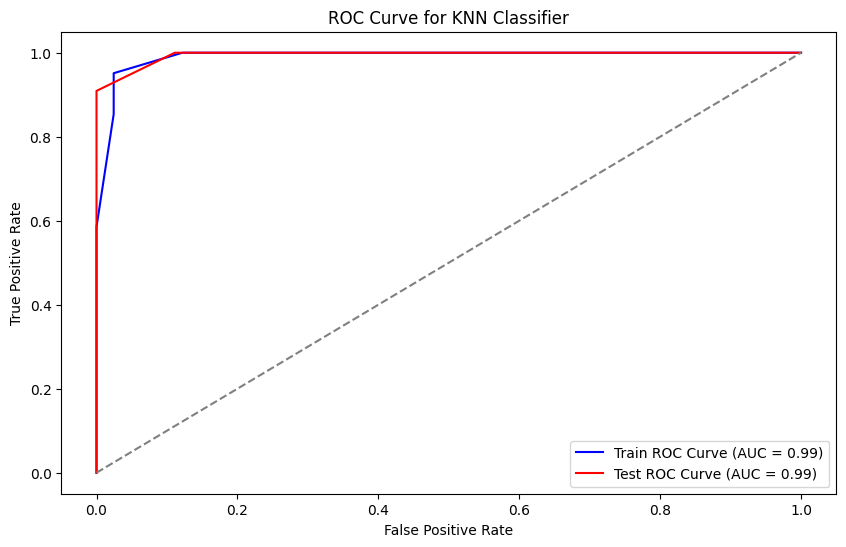

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
Y_prob_train = best_knn.predict_proba(X_train_resampled)[:, 1]
Y_prob_test = best_knn.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_train, tpr_train, thresholds_train = roc_curve(Y_train_resampled, Y_prob_train)
fpr_test, tpr_test, thresholds_test = roc_curve(Y_test, Y_prob_test)

# Calculate AUC (Area Under the Curve)
auc_train = roc_auc_score(Y_train_resampled, Y_prob_train)
auc_test = roc_auc_score(Y_test, Y_prob_test)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC Curve (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', label=f'Test ROC Curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classifier')
plt.legend()
plt.show()
